Write a python code to use the CWT coefficients and other key indicators to train a machine learning model, such as a neural network or regression model to predict stock price using data from yfinance.

In [63]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import pywt

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import talib

from matplotlib import pyplot as plt



In [73]:
# Download stock data from yfinance
stock = yf.Ticker('AAPL')
df = stock.history(period='1y')
df=df.dropna()
# Create time series data for CWT
time_series_data = df['Close'].values

# Perform CWT and obtain coefficients
cwt_coefficients, frequencies = pywt.cwt(time_series_data, np.arange(1, 31), 'mexh')

# Create feature matrix with CWT coefficients and other key indicators
df['50ma'] = df['Close'].rolling(window=50).mean()
df['200ma'] = df['Close'].rolling(window=200).mean()
df['rsi'] = talib.RSI(df['Close'], 14)
#feature_matrix = np.hstack([cwt_coefficients.T, df[['Open', 'High', 'Low', 'Volume', '50ma', '200ma', 'rsi']].values])
feature_matrix = np.hstack([cwt_coefficients.T])

#removing nan
feature_matrix = feature_matrix[:, ~np.isnan(feature_matrix).any(axis=0)]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, df['Close'], test_size=0.3, random_state=42)


In [74]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a neural network regression model
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions on testing data
y_pred = mlp.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')




MSE: 8.69


/Users/binod/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(-5.0, 5.0)

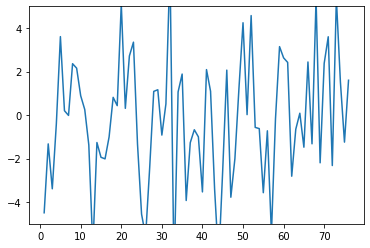

In [76]:
t=np.arange(1,len(y_test)+1,1)
#plt.plot(t,y_test,c="red")
#plt.plot(t,y_pred,c="blue")
plt.plot(t,y_pred-y_test)
plt.ylim(-5,5)
#plt.xlim(0,200)

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the function to get the stock data and calculate the indicators
def get_data(ticker):
    #data = yf.download(ticker, period="max")
    data = yf.download(ticker, period="2y")
    data["SMA20"] = data["Close"].rolling(window=20).mean()
    data["SMA50"] = data["Close"].rolling(window=50).mean()
    data["SMA200"] = data["Close"].rolling(window=200).mean()
    data["EMA20"] = data["Close"].ewm(span=20, adjust=False).mean()
    data["EMA50"] = data["Close"].ewm(span=50, adjust=False).mean()
    data["EMA200"] = data["Close"].ewm(span=200, adjust=False).mean()
    data["MACD"] = data["Close"].ewm(span=12, adjust=False).mean() - data["Close"].ewm(span=26, adjust=False).mean()
    data["RSI"] = 100 - (100 / (1 + (data["Close"].diff(1).fillna(0) > 0).rolling(window=14).mean()))
    data["ADX"] = talib.ADX(data["High"], data["Low"], data["Close"], timeperiod=14)
    data["ATR"] = talib.ATR(data["High"], data["Low"], data["Close"], timeperiod=14)
    data["CCI"] = talib.CCI(data["High"], data["Low"], data["Close"], timeperiod=20)
    data["ROC"] = talib.ROC(data["Close"], timeperiod=10)
    data["WILLR"] = talib.WILLR(data["High"], data["Low"], data["Close"], timeperiod=14)
    data["OBV"] = talib.OBV(data["Close"], data["Volume"])
    data["Chaikin"] = talib.ADOSC(data["High"], data["Low"], data["Close"], data["Volume"], fastperiod=3, slowperiod=10)
    data["MFI"] = talib.MFI(data["High"], data["Low"], data["Close"], data["Volume"], timeperiod=14)
    data["STOCH"] = talib.STOCH(data["High"], data["Low"], data["Close"], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[0]
    data["CCI"] = talib.CCI(data["High"], data["Low"], data["Close"], timeperiod=14)
    data = data.dropna()
    return data

# Get the data for the stock
data = get_data("AAPL")

# Split the data into training and testing sets
X = data.drop(["Close"], axis=1)
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared{mse:.2f}")


[*********************100%***********************]  1 of 1 completed
Mean Squared0.34


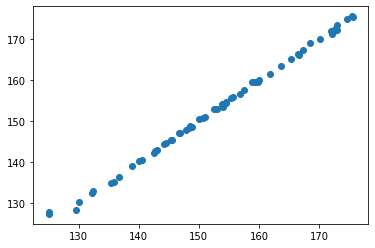

In [29]:
a=zip(y_test,y_pred)
plt.scatter(y_test,y_pred)

Example 3: Python code to predict the stock price for a week later using key indicators and machine learning

In [77]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [78]:
# Download the stock data from Yahoo Finance
symbol = "AAPL" # Change this to the symbol of the stock you want to predict
start_date = "2020-01-01" # Change this to the start date of the data
end_date = "2023-03-20" # Change this to the end date of the data
df = yf.download(symbol, start=start_date, end=end_date)

# Define the key indicators
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

# Drop any rows with missing values
df.dropna(inplace=True)

# Define the features and target variable
features = ["Close", "Volume", "MA20", "MA50", "MA200"]
target = "Close"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


[*********************100%***********************]  1 of 1 completed
Mean Squared Error: 0.02693199201533717


In [81]:
# Predict the stock price for a week later
last_row = df.tail(1)[features]
next_week = pd.date_range(start=df.index[-1], periods=7, freq="D")[1:]
next_week_df = pd.DataFrame(index=next_week, columns=features)
next_week_df.loc[:, :] = last_row.values
next_week_pred = model.predict(next_week_df)
print("Next week's predicted closing prices:", next_week_pred)

Next week's predicted closing prices: [154.99799942 154.99799942 154.99799942 154.99799942 154.99799942
 154.99799942]


# Python code to predict stock price for a month in future using 2 key indicators and machine learning. Use data from yfinance. Try to be as accurate as possible and also use correlation with other financial indicators.

In [84]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import talib

In [94]:
# Download the stock data from Yahoo Finance
symbol = "AAPL" # Change this to the symbol of the stock you want to predict
start_date = "2016-01-01" # Change this to the start date of the data
end_date = "2023-03-20" # Change this to the end date of the data
df = yf.download(symbol, start=start_date, end=end_date)

# Define the key indicators
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

# Define the other financial indicators
df["RSI"] = talib.RSI(df["Close"].values, timeperiod=14)
df["MACD"], _, _ = talib.MACD(df["Close"].values, fastperiod=12, slowperiod=26, signalperiod=9)
df["OBV"] = talib.OBV(df["Close"].values, np.array(df["Volume"].values,dtype="f8"))

# Drop any rows with missing values
df.dropna(inplace=True)

# Define the features and target variable
features = ["Close", "Volume", "MA20", "MA50", "RSI", "MACD", "OBV"]
target = "Close"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict the stock price for a month in the future
last_row = df.tail(1)[features]
next_month = pd.date_range(start=df.index[-1], periods=30, freq="D")[1:]
next_month_df = pd.DataFrame(index=next_month, columns=features)
next_month_df.loc[:, :] = last_row.values
next_month_pred = model.predict(next_month_df)
print("Next month's predicted closing prices:", next_month_pred)


[*********************100%***********************]  1 of 1 completed
Mean Squared Error: 0.07451464227310013
Next month's predicted closing prices: [154.98309952 154.98309952 154.98309952 154.98309952 154.98309952
 154.98309952 154.98309952 154.98309952 154.98309952 154.98309952
 154.98309952 154.98309952 154.98309952 154.98309952 154.98309952
 154.98309952 154.98309952 154.98309952 154.98309952 154.98309952
 154.98309952 154.98309952 154.98309952 154.98309952 154.98309952
 154.98309952 154.98309952 154.98309952 154.98309952]
